In [2]:
# pip install duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 64.0 MB/s eta 0:00:004 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import duckdb


def load_results(res_list):
    df_list = []
    for f in res_list:
        df = pd.read_csv(f)
        df_list.append(df)
        # drop_first_row = df.iloc[1:]
        # df_list.append(drop_first_row)
    df = pd.concat(df_list)

    sql = """
        SELECT 
            ((max(CAST(qid AS INTEGER))+1)/3)::INTEGER as qid,
            spatial_resolution, 
            temporal_resolution,
            time_span, 
            area_persent, 
            category, 
            avg(execution_time) as avg_execution_time
        FROM df
        GROUP BY spatial_resolution, temporal_resolution, time_span, area_persent, category
        ORDER BY max(qid)
        """
    df_avg = duckdb.query(sql).to_df()
    return df_avg

In [36]:
import glob
result_list = glob.glob("proposed_get_raster_test_025H*_result_*.csv")
df_proposed = load_results(result_list)
df_proposed

vanilla_list = glob.glob("vanilla_get_raster_test_025H*_result_*.csv")
df_vanilla = load_results(vanilla_list)
df_vanilla

cloud_list = glob.glob("cloud_get_raster_test_025H*_result_*.csv")
df_cloud = load_results(cloud_list)
df_cloud

,qid,spatial_resolution,temporal_resolution,time_span,area_persent,category,avg_execution_time
0,1,0.25,hour,5.0,1,changing_area,1313.718881
1,2,0.25,hour,5.0,25,changing_area,1294.805132
2,3,0.25,hour,5.0,50,changing_area,1294.140113
3,4,0.25,hour,5.0,100,changing_area,1016.975517
4,5,0.25,hour,1.0,100,changing_time,479.898530
5,6,0.25,hour,2.5,100,changing_time,816.216742
6,7,0.25,hour,5.0,100,changing_time,1313.027094
7,8,0.25,hour,10.0,100,changing_time,1720.334727
8,9,0.25,hour,5.0,100,changing_spatial_res,1014.415240
9,10,0.50,hour,5.0,100,changing_spatial_res,893.170872


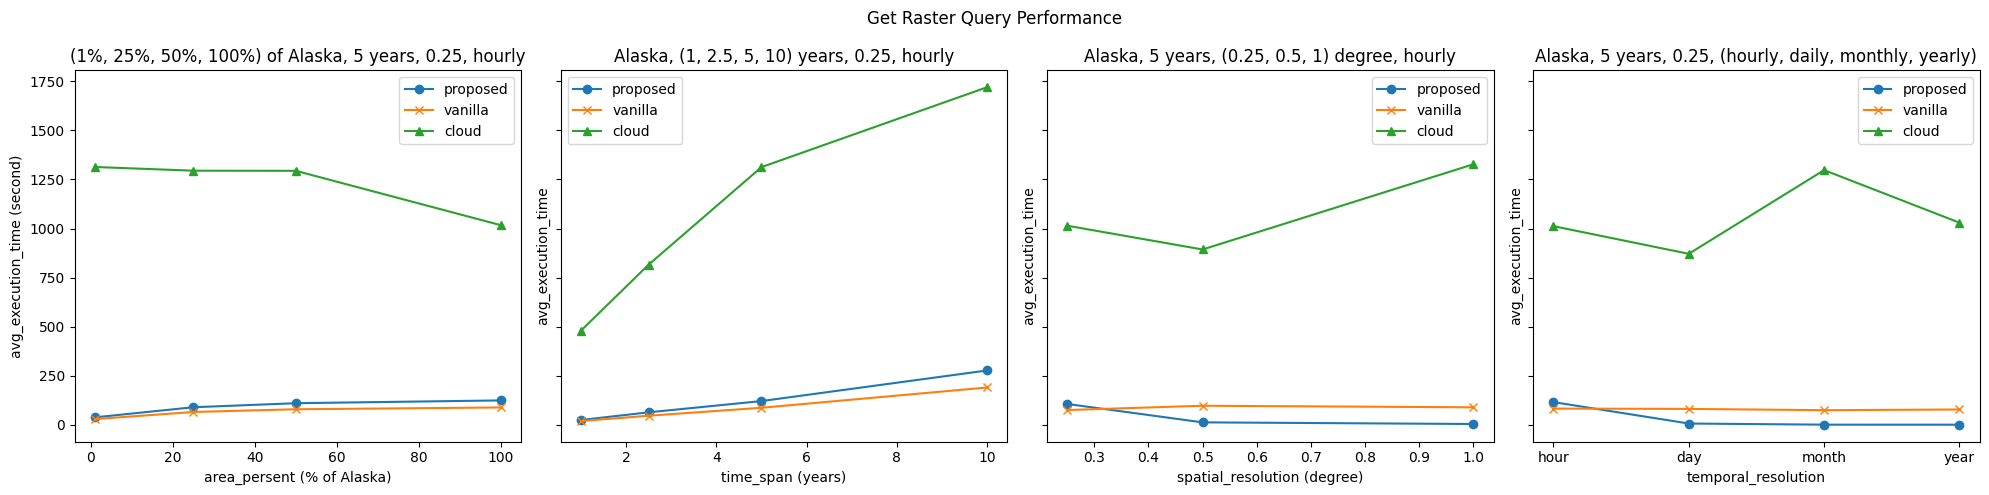

In [26]:
import matplotlib.pyplot as plt

# subplot (1, 4)
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# axs[0]: changing_area, x axis is area_persent and y axis is avg_execution_time
df_changing_area = df_proposed[df_proposed["category"] == "changing_area"]
axs[0].plot(df_changing_area["area_persent"], df_changing_area["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_area = df_vanilla[df_vanilla["category"] == "changing_area"]
axs[0].plot(df_vanilla_changing_area["area_persent"], df_vanilla_changing_area["avg_execution_time"], label="vanilla", marker="x")
df_cloud_changing_area = df_cloud[df_cloud["category"] == "changing_area"]
axs[0].plot(df_cloud_changing_area["area_persent"], df_cloud_changing_area["avg_execution_time"], label="cloud", marker="^")
axs[0].set_title("(1%, 25%, 50%, 100%) of Alaska, 5 years, 0.25, hourly")
axs[0].set_xlabel("area_persent (% of Alaska)")
axs[0].set_ylabel("avg_execution_time (second)")
axs[0].legend()

# axs[1]: changing_time, x axis is time_span and y axis is avg_execution_time
df_changing_time = df_proposed[df_proposed["category"] == "changing_time"]
axs[1].plot(df_changing_time["time_span"], df_changing_time["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_time = df_vanilla[df_vanilla["category"] == "changing_time"]
axs[1].plot(df_vanilla_changing_time["time_span"], df_vanilla_changing_time["avg_execution_time"], label="vanilla", marker="x")
df_cloud_changing_time = df_cloud[df_cloud["category"] == "changing_time"]
axs[1].plot(df_cloud_changing_time["time_span"], df_cloud_changing_time["avg_execution_time"], label="cloud", marker="^")
axs[1].set_title("Alaska, (1, 2.5, 5, 10) years, 0.25, hourly")
axs[1].set_xlabel("time_span (years)")
axs[1].set_ylabel("avg_execution_time")
axs[1].legend()

# axs[2]: changing_spatial_res, x axis is spatial_resolution and y axis is avg_execution_time
df_changing_spatial_res = df_proposed[df_proposed["category"] == "changing_spatial_res"]
axs[2].plot(df_changing_spatial_res["spatial_resolution"], df_changing_spatial_res["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_spatial_res = df_vanilla[df_vanilla["category"] == "changing_spatial_res"]
axs[2].plot(df_vanilla_changing_spatial_res["spatial_resolution"], df_vanilla_changing_spatial_res["avg_execution_time"], label="vanilla", marker="x")
df_cloud_changing_spatial_res = df_cloud[df_cloud["category"] == "changing_spatial_res"]
axs[2].plot(df_cloud_changing_spatial_res["spatial_resolution"], df_cloud_changing_spatial_res["avg_execution_time"], label="cloud", marker="^")
axs[2].set_title("Alaska, 5 years, (0.25, 0.5, 1) degree, hourly")
axs[2].set_xlabel("spatial_resolution (degree)")
axs[2].set_ylabel("avg_execution_time")
axs[2].legend()

# axs[3]: changing_temporal_res, x axis is temporal_resolution and y axis is avg_execution_time
df_changing_temporal_res = df_proposed[df_proposed["category"] == "changing_temporal_res"]
axs[3].plot(df_changing_temporal_res["temporal_resolution"], df_changing_temporal_res["avg_execution_time"], label="proposed", marker="o")
df_vanilla_changing_temporal_res = df_vanilla[df_vanilla["category"] == "changing_temporal_res"]
axs[3].plot(df_vanilla_changing_temporal_res["temporal_resolution"], df_vanilla_changing_temporal_res["avg_execution_time"], label="vanilla", marker="x")
df_cloud_changing_temporal_res = df_cloud[df_cloud["category"] == "changing_temporal_res"]
axs[3].plot(df_cloud_changing_temporal_res["temporal_resolution"], df_cloud_changing_temporal_res["avg_execution_time"], label="cloud", marker="^")
axs[3].set_title("Alaska, 5 years, 0.25, (hourly, daily, monthly, yearly)")
axs[3].set_xlabel("temporal_resolution")
axs[3].set_ylabel("avg_execution_time")
axs[3].legend()

# add fig title
fig.suptitle("Get Raster Query Performance")

fig.tight_layout()
plt.show()

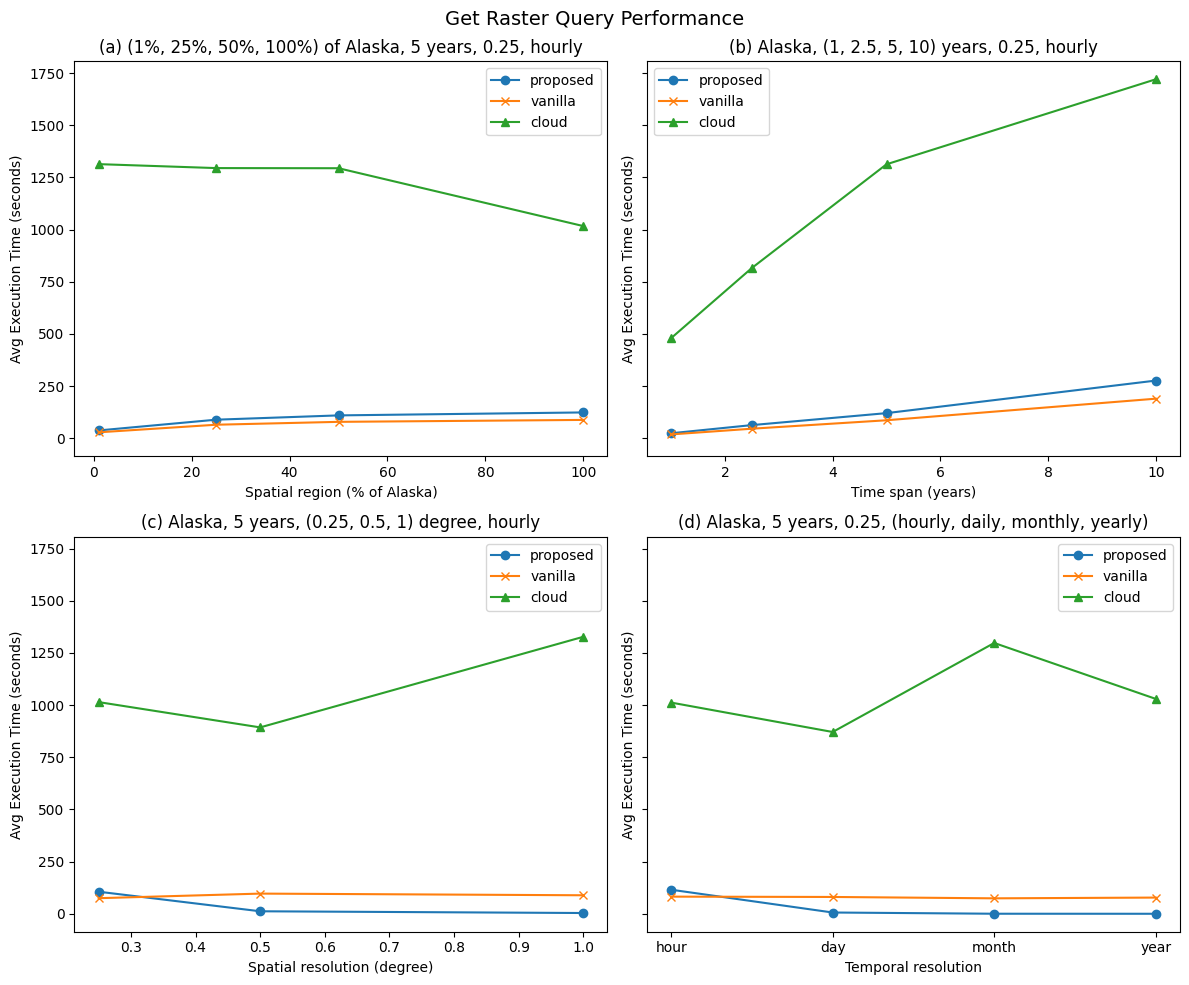

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
titles = [
    "(a) (1%, 25%, 50%, 100%) of Alaska, 5 years, 0.25, hourly",
    "(b) Alaska, (1, 2.5, 5, 10) years, 0.25, hourly",
    "(c) Alaska, 5 years, (0.25, 0.5, 1) degree, hourly",
    "(d) Alaska, 5 years, 0.25, (hourly, daily, monthly, yearly)"
]
categories = ["changing_area", "changing_time", "changing_spatial_res", "changing_temporal_res"]
# x_labels = ["area_persent (% of Alaska)", "time_span (years)", "spatial_resolution (degree)", "temporal_resolution"]
x_labels = ["Spatial region (% of Alaska)", "Time span (years)", "Spatial resolution (degree)", "Temporal resolution"]
axs = axs.flatten()
for i, (category, xlabel) in enumerate(zip(categories, x_labels)):
    df_proposed_cat = df_proposed[df_proposed["category"] == category]
    df_vanilla_cat = df_vanilla[df_vanilla["category"] == category]
    df_cloud_cat = df_cloud[df_cloud["category"] == category]
    
    if category == "changing_area":
        x_col = "area_persent"
    elif category == "changing_time":
        x_col = "time_span"
    elif category == "changing_spatial_res":
        x_col = "spatial_resolution"
    else:  # "changing_temporal_res"
        x_col = "temporal_resolution"
    
    axs[i].plot(df_proposed_cat[x_col], df_proposed_cat["avg_execution_time"], label="proposed", marker="o")
    axs[i].plot(df_vanilla_cat[x_col], df_vanilla_cat["avg_execution_time"], label="vanilla", marker="x")
    axs[i].plot(df_cloud_cat[x_col], df_cloud_cat["avg_execution_time"], label="cloud", marker="^")
    
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel("Avg Execution Time (seconds)")
    axs[i].legend()

fig.suptitle("Get Raster Query Performance", fontsize=14)
fig.tight_layout()
plt.show()

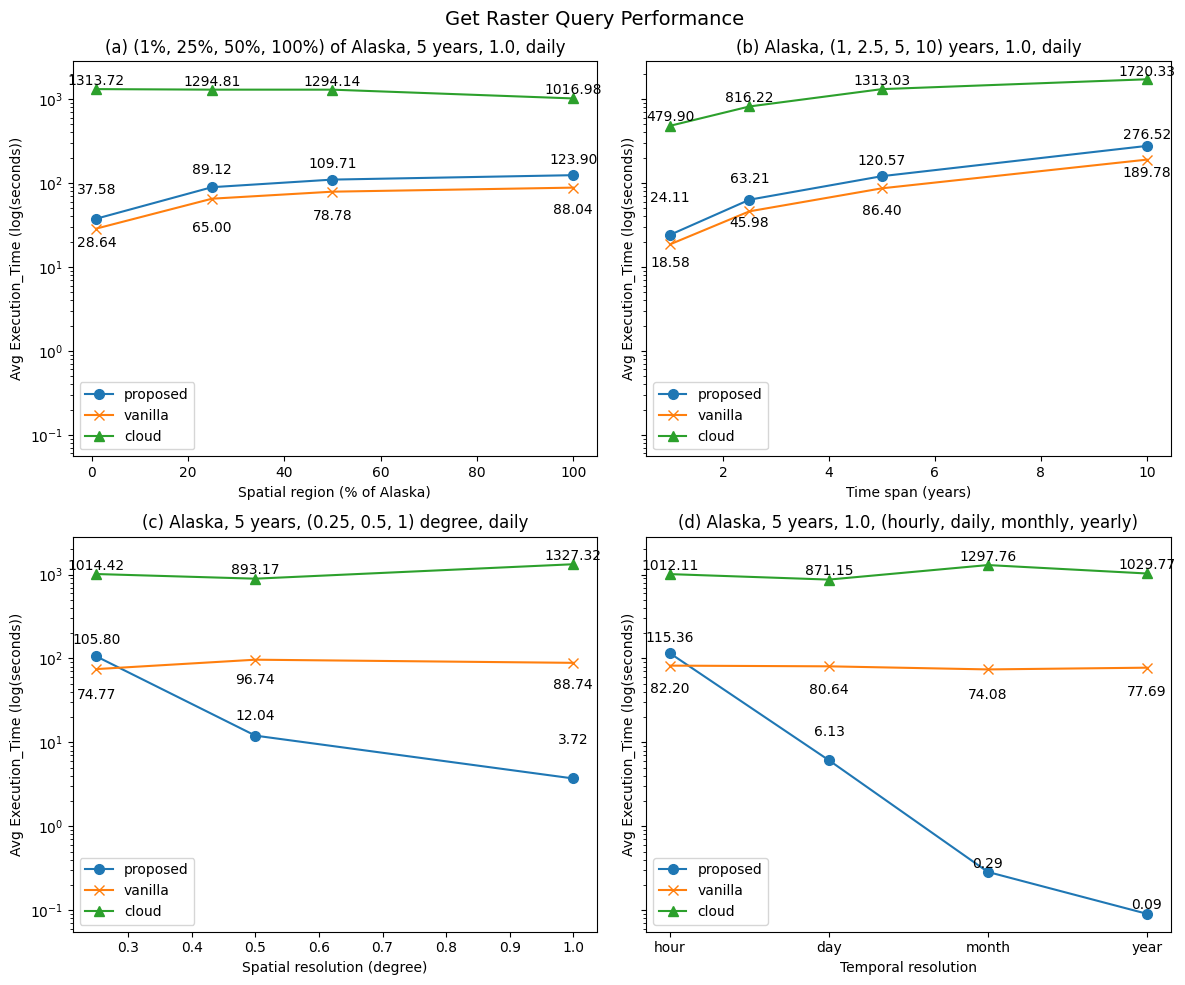

In [58]:
# Log scale

import matplotlib.pyplot as plt

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Define subplot titles with subtitles (a, b, c, d)
titles = [
    "(a) (1%, 25%, 50%, 100%) of Alaska, 5 years, 1.0, daily",
    "(b) Alaska, (1, 2.5, 5, 10) years, 1.0, daily",
    "(c) Alaska, 5 years, (0.25, 0.5, 1) degree, daily",
    "(d) Alaska, 5 years, 1.0, (hourly, daily, monthly, yearly)"
]

# Data categories and x labels
categories = ["changing_area", "changing_time", "changing_spatial_res", "changing_temporal_res"]
# x_labels = ["area_persent (% of Alaska)", "time_span (years)", "spatial_resolution (degree)", "temporal_resolution"]
x_labels = ["Spatial region (% of Alaska)", "Time span (years)", "Spatial resolution (degree)", "Temporal resolution"]

marker_size = 7
fs = 10

# Flatten axs array for easier indexing
axs = axs.flatten()

# Plot each category with correct x-axis values
for i, (category, xlabel) in enumerate(zip(categories, x_labels)):
    df_proposed_cat = df_proposed[df_proposed["category"] == category]
    df_vanilla_cat = df_vanilla[df_vanilla["category"] == category]
    df_cloud_cat = df_cloud[df_cloud["category"] == category]
    
    if category == "changing_area":
        x_col = "area_persent"
    elif category == "changing_time":
        x_col = "time_span"
    elif category == "changing_spatial_res":
        x_col = "spatial_resolution"
    else:  # "changing_temporal_res"
        x_col = "temporal_resolution"
    
    axs[i].set_yscale("log")  # Set y-axis to logarithmic scale
    
    for df, label, marker in zip([df_proposed_cat, df_vanilla_cat, df_cloud_cat],
                                  ["proposed", "vanilla", "cloud"],
                                  ["o", "x", "^"]):
        axs[i].plot(df[x_col], df["avg_execution_time"], label=label, marker=marker, ms=marker_size)
        if label == "cloud":
            for x, y in zip(df[x_col], df["avg_execution_time"]):
                axs[i].text(x, y+30, f"{y:.2f}", fontsize=fs, ha='center', va='bottom')  # Annotate points with execution time
        elif label == "vanilla":
            for x, y in zip(df[x_col], df["avg_execution_time"]):
                if y < 50:
                    axs[i].text(x, y-5, f"{y:.2f}", fontsize=fs, ha='center', va='top')
                else:
                    axs[i].text(x, y-30, f"{y:.2f}", fontsize =fs, ha='center', va='top')
        else:
            for x, y in zip(df[x_col], df["avg_execution_time"]):
                if y < 1:
                    axs[i].text(x, y+0.005, f"{y:.2f}", fontsize=fs, ha='center', va='bottom')
                elif y < 20:
                    axs[i].text(x, y+5, f"{y:.2f}", fontsize=fs, ha='center', va='bottom')
                else:
                    axs[i].text(x, y+30, f"{y:.2f}", fontsize=fs, ha='center', va='bottom')
        
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel("Avg Execution_Time (log(seconds))")
    axs[i].legend()

# Add figure title
fig.suptitle("Get Raster Query Performance", fontsize=14)
fig.tight_layout()
plt.show()


### Plots with TileDB experiments:

In [28]:
import glob
result_list = glob.glob("proposed_get_raster_TileDBtest_result_*.csv")
df_proposed = load_results(result_list)
df_proposed

vanilla_list = glob.glob("vanilla_get_raster_TileDBtest_result_*.csv")
df_vanilla = load_results(vanilla_list)
df_vanilla

tiledb_list = glob.glob("tiledb_get_raster_test_result_*.csv")
df_tiledb = load_results(tiledb_list)
df_tiledb

,qid,spatial_resolution,temporal_resolution,time_span,area_persent,category,avg_execution_time
0,1,1.00,day,5,1,changing_area,1299.635224
1,2,1.00,day,5,25,changing_area,1474.688539
2,3,1.00,day,5,50,changing_area,1620.074204
3,4,1.00,day,5,100,changing_area,1746.928927
4,5,1.00,day,1,100,changing_time,367.757382
5,6,1.00,day,5,100,changing_time,1757.703275
6,7,0.25,day,5,100,changing_spatial_res,1742.826816
7,8,0.50,day,5,100,changing_spatial_res,1757.162770
8,9,1.00,day,5,100,changing_spatial_res,1737.299398
9,10,1.00,hour,5,100,changing_temporal_res,41071.060807


### Including changing time results for tiledb with Log Scale

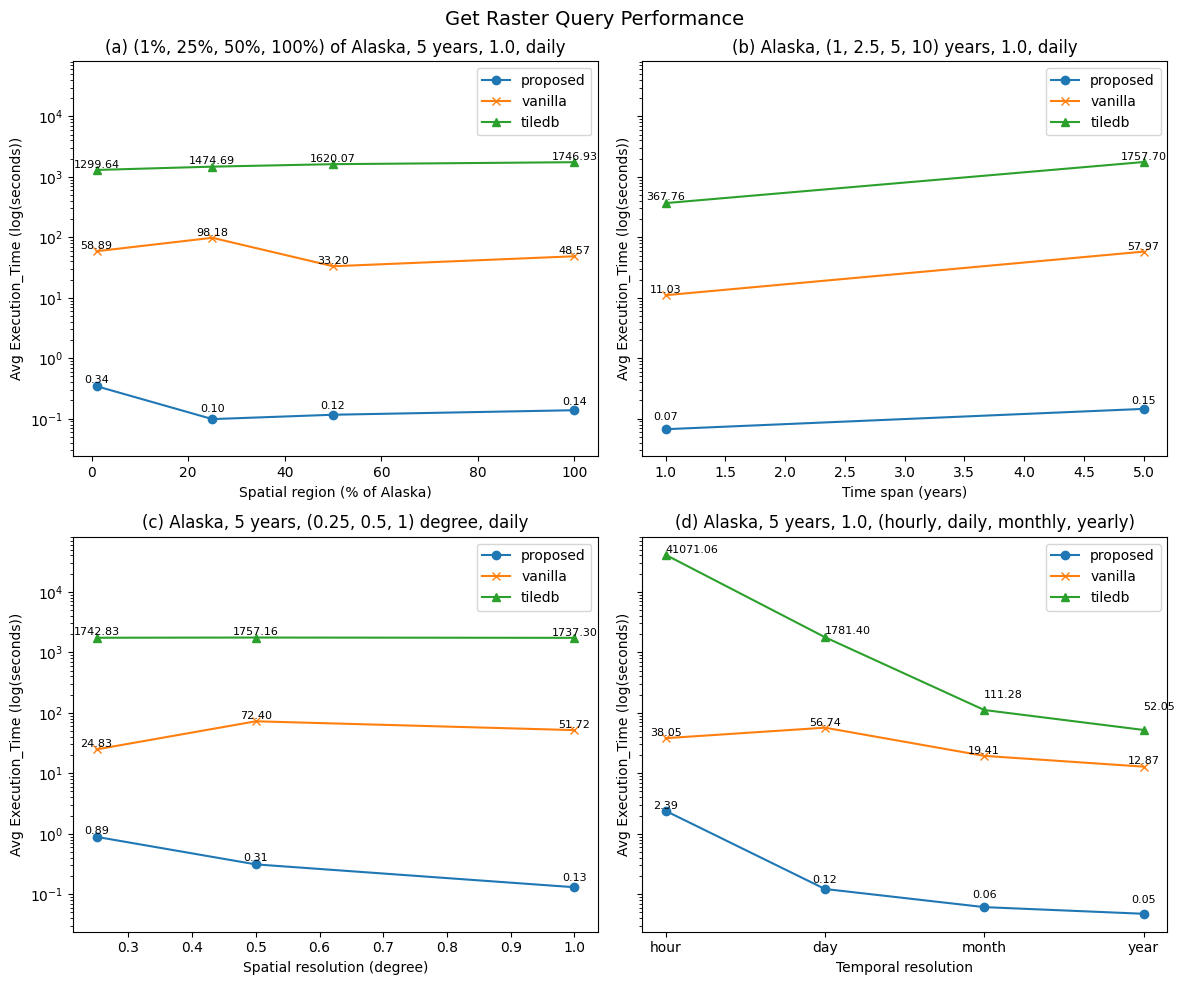

In [34]:
# Log scale

import matplotlib.pyplot as plt

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

# Define subplot titles with subtitles (a, b, c, d)
titles = [
    "(a) (1%, 25%, 50%, 100%) of Alaska, 5 years, 1.0, daily",
    "(b) Alaska, (1, 2.5, 5, 10) years, 1.0, daily",
    "(c) Alaska, 5 years, (0.25, 0.5, 1) degree, daily",
    "(d) Alaska, 5 years, 1.0, (hourly, daily, monthly, yearly)"
]

# Data categories and x labels
categories = ["changing_area", "changing_time", "changing_spatial_res", "changing_temporal_res"]
# x_labels = ["area_persent (% of Alaska)", "time_span (years)", "spatial_resolution (degree)", "temporal_resolution"]
x_labels = ["Spatial region (% of Alaska)", "Time span (years)", "Spatial resolution (degree)", "Temporal resolution"]


# Flatten axs array for easier indexing
axs = axs.flatten()

# Plot each category with correct x-axis values
for i, (category, xlabel) in enumerate(zip(categories, x_labels)):
    df_proposed_cat = df_proposed[df_proposed["category"] == category]
    df_vanilla_cat = df_vanilla[df_vanilla["category"] == category]
    df_tiledb_cat = df_tiledb[df_tiledb["category"] == category]
    
    if category == "changing_area":
        x_col = "area_persent"
    elif category == "changing_time":
        x_col = "time_span"
    elif category == "changing_spatial_res":
        x_col = "spatial_resolution"
    else:  # "changing_temporal_res"
        x_col = "temporal_resolution"
    
    axs[i].set_yscale("log")  # Set y-axis to logarithmic scale
    
    for df, label, marker in zip([df_proposed_cat, df_vanilla_cat, df_tiledb_cat],
                                  ["proposed", "vanilla", "tiledb"],
                                  ["o", "x", "^"]):
        axs[i].plot(df[x_col], df["avg_execution_time"], label=label, marker=marker)
        if label == "proposed":
            for x, y in zip(df[x_col], df["avg_execution_time"]):
                axs[i].text(x, y+0.02, f"{y:.2f}", fontsize=8, ha='center', va='bottom')  # Annotate points with execution time
        elif label == "vanilla":
            for x, y in zip(df[x_col], df["avg_execution_time"]):
                axs[i].text(x, y+0.2, f"{y:.2f}", fontsize = 8, ha='center', va='bottom')
        else:
            for x, y in zip(df[x_col], df["avg_execution_time"]):
                if x_col=="temporal_resolution":
                    axs[i].text(x, y+50, f"{y:.2f}", fontsize=8, ha='left', va='bottom')
                else:
                    axs[i].text(x, y+20, f"{y:.2f}", fontsize=8, ha='center', va='bottom')
        
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel("Avg Execution_Time (log(seconds))")
    axs[i].legend()

# Add figure title
fig.suptitle("Get Raster Query Performance", fontsize=14)
fig.tight_layout()
plt.show()


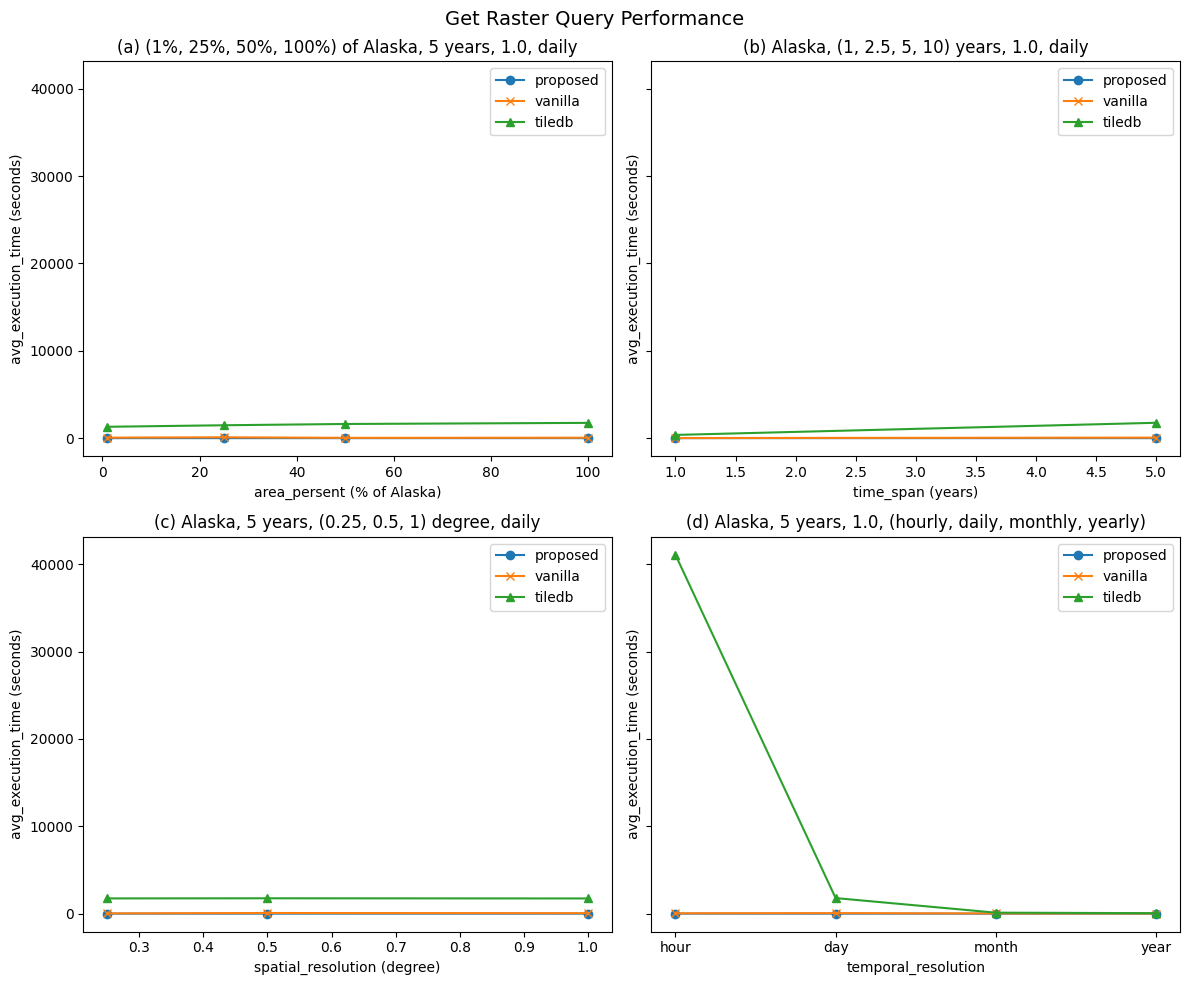

In [32]:
# INCLUDING CHANGINT TIME RESOLUTION FOR TILEDB

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)

titles = [
    "(a) (1%, 25%, 50%, 100%) of Alaska, 5 years, 1.0, daily",
    "(b) Alaska, (1, 2.5, 5, 10) years, 1.0, daily",
    "(c) Alaska, 5 years, (0.25, 0.5, 1) degree, daily",
    "(d) Alaska, 5 years, 1.0, (hourly, daily, monthly, yearly)"
]
categories = ["changing_area", "changing_time", "changing_spatial_res", "changing_temporal_res"]
x_labels = ["area_persent (% of Alaska)", "time_span (years)", "spatial_resolution (degree)", "temporal_resolution"]
axs = axs.flatten()
for i, (category, xlabel) in enumerate(zip(categories, x_labels)):
    df_proposed_cat = df_proposed[df_proposed["category"] == category]
    df_vanilla_cat = df_vanilla[df_vanilla["category"] == category]
    df_tiledb_cat = df_tiledb[df_tiledb["category"] == category]
    
    if category == "changing_area":
        x_col = "area_persent"
    elif category == "changing_time":
        x_col = "time_span"
    elif category == "changing_spatial_res":
        x_col = "spatial_resolution"
    else:  # "changing_temporal_res"
        x_col = "temporal_resolution"
    
    axs[i].plot(df_proposed_cat[x_col], df_proposed_cat["avg_execution_time"], label="proposed", marker="o")
    axs[i].plot(df_vanilla_cat[x_col], df_vanilla_cat["avg_execution_time"], label="vanilla", marker="x")
    axs[i].plot(df_tiledb_cat[x_col], df_tiledb_cat["avg_execution_time"], label="tiledb", marker="^")
    
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(xlabel)
    axs[i].set_ylabel("avg_execution_time (seconds)")
    axs[i].legend()
fig.suptitle("Get Raster Query Performance", fontsize=14)
fig.tight_layout()
plt.show()